In [1]:
using StaticArrays
using LinearAlgebra
# using Makie
using GLMakie 
using LsqFit
include("Elastic.jl")
using .Elastic
using DelimitedFiles
using Distributions
using Statistics
using Plots
using Test
using IterTools
using BenchmarkTools

using LaTeXStrings


In [2]:
atom_positions = [
    Vector([0.0, 0.0, 0.0]),
    Vector([0.0, 0.5, 0.5]),
    Vector([0.5, 0.0, 0.5]),
    Vector([0.5, 0.5, 0.0]),
    Vector([1.0, 0.0, 0.0]),
    Vector([0.0, 1.0, 0.0]),
    Vector([0.0, 0.0, 1.0]),
    Vector([0.5, 1.0, 0.5]),
    Vector([1.0, 0.5, 0.5]),
    Vector([0.5, 0.5, 1.0]),
    Vector([1.0, 0.0, 1.0]),
    Vector([1.0, 1.0, 0.0]),
    Vector([0.0, 1.0, 1.0]),
    Vector([1.0, 1.0, 1.0])
] 
kb=8.617332385e-5 #eV/K
amuM=1.03642701e-4 #[m]/amu
Mcu=63.546 #amu
lattice_constant = 3.61 #A

# 定义铜的FCC晶胞的基矢量
lattice_vectors = collect((Matrix([
    lattice_constant 0.0 0.0; #a1
    0.0 lattice_constant 0.0; #a2
    0.0 0.0 lattice_constant] #a3
))')

# 创建铜的原子列表
atoms = [Atom(pos,Mcu*amuM) for pos in atom_positions]


cell=UnitCell(lattice_vectors,atoms)
cpcell=copycell(cell,2,2,2)
fcell=filtercell(cpcell)
visualize_unitcell_atoms(fcell)

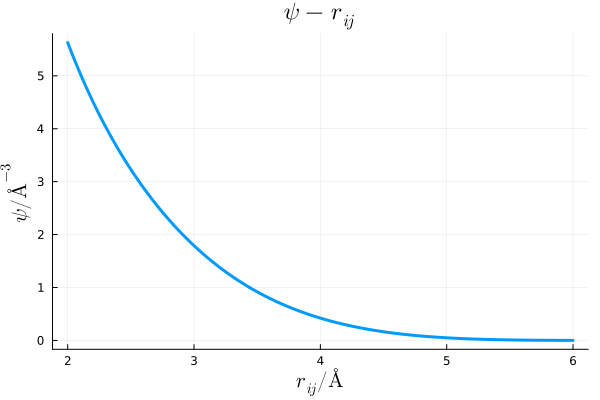

In [3]:
xx=2.0:0.001:6.0
y=EMAAl1_psi.(xx)
Plots.plot(xx,y,label="",xlabel=L"r_{ij}/\mathrm{\AA}",ylabel=L"\psi/\mathrm{\AA^{-3}}",title=L"\psi-r_{ij}", xlabelfontsize=14, ylabelfontsize=14, titlefontsize=16,lw=3)

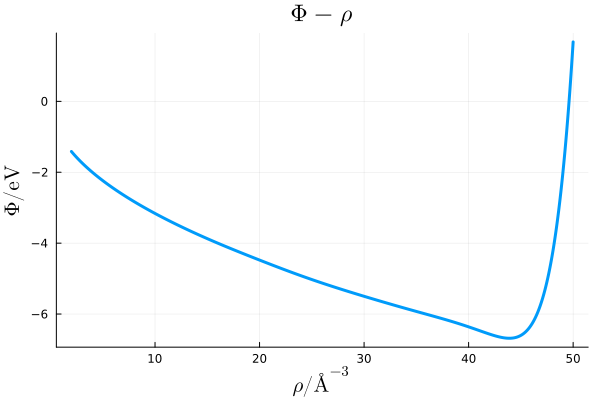

In [5]:
xx=2.0:0.001:50.0
y=EMAAl1_Phi.(xx)
Plots.plot(xx,y,label="",xlabel=L"\rho/\mathrm{\AA^{-3}}",ylabel=L"\Phi/\mathrm{eV}",title=L"\Phi-\rho", xlabelfontsize=14, ylabelfontsize=14, titlefontsize=16,lw=3)

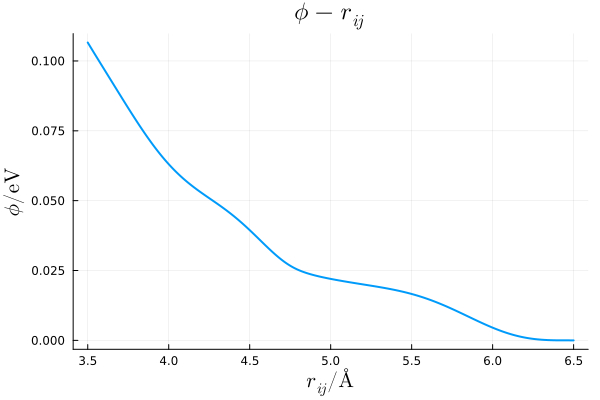

In [10]:
ct=6.5
embeddingAl1=Embedding(embedding_energyAl1, embedding_forceAl1i)
interaction=Interaction(EMAAl1_phi, EMAAl1_phi_gradient, ct, 0.1,embeddingAl1)
xx=3.5:0.001:6.5
y=interaction.cutenergy.(xx)
Plots.plot(xx,y,label="",xlabel=L"r_{ij}/\mathrm{\AA}",ylabel=L"\phi/\mathrm{eV}",title=L"\phi-r_{ij}", xlabelfontsize=14, ylabelfontsize=14, titlefontsize=16,lw=2)


In [8]:
EMACu_phi(1.900001)

1.1259056176604645

In [11]:
pressure_int(fcell,interaction)

3.842753657309884081440585895546354074678998905821736734782349217561846007226129

In [12]:
dUdhij(fcell,interaction,BigFloat("1e-5"))

3×3 Matrix{Float64}:
 -0.000232353  -1.88953e-7   -2.36191e-7
 -2.17296e-7   -0.000232683  -1.70058e-7
 -2.36191e-7   -1.88953e-7   -0.000232668

In [16]:
cl,El=minimizeEnergy!(fcell, interaction,rg=[3.7,4.5])

(3.7:0.0008008008008008008:4.5, [-777.932727068717, -778.3157724765547, -778.6926429633954, -779.063638201683, -779.4290486986275, -779.7891560071625, -780.1442329285564, -780.4945437122047, -780.8403442519904, -781.1818822766827  …  -787.359373667411, -787.1409936036225, -786.9228027920109, -786.7048020657542, -786.486992221561, -786.269374021189, -786.0519481888183, -785.834715411612, -785.6176763406862, -785.4008315881149])

In [14]:
fcell

UnitCell([4.045345345345345 0.0 0.0; 0.0 4.045345345345345 0.0; 0.0 0.0 4.045345345345345], Atom[Atom([-2.0, -2.0, -2.0], [0.0, 0.0, 0.0], 0.006586079077746, 8, [1, 1, 1]), Atom([-2.0, -2.0, -1.0], [0.0, 0.0, 0.0], 0.006586079077746, 4, [1, 1, 0]), Atom([-2.0, -2.0, 0.0], [0.0, 0.0, 0.0], 0.006586079077746, 4, [1, 1, 0]), Atom([-2.0, -2.0, 1.0], [0.0, 0.0, 0.0], 0.006586079077746, 4, [1, 1, 0]), Atom([-2.0, -1.0, -2.0], [0.0, 0.0, 0.0], 0.006586079077746, 4, [1, 0, 1]), Atom([-2.0, -1.0, -1.0], [0.0, 0.0, 0.0], 0.006586079077746, 2, [1, 0, 0]), Atom([-2.0, -1.0, 0.0], [0.0, 0.0, 0.0], 0.006586079077746, 2, [1, 0, 0]), Atom([-2.0, -1.0, 1.0], [0.0, 0.0, 0.0], 0.006586079077746, 2, [1, 0, 0]), Atom([-2.0, 0.0, -2.0], [0.0, 0.0, 0.0], 0.006586079077746, 4, [1, 0, 1]), Atom([-2.0, 0.0, -1.0], [0.0, 0.0, 0.0], 0.006586079077746, 2, [1, 0, 0])  …  Atom([1.5, -0.5, 0.0], [0.0, 0.0, 0.0], 0.006586079077746, 1, [0, 0, 0]), Atom([1.5, -0.5, 1.0], [0.0, 0.0, 0.0], 0.006586079077746, 1, [0, 0, 0])

In [19]:
force_tensor(fcell,interaction)

3×3 Matrix{Float64}:
 -1.74422e-16   7.39888e-15   4.27681e-15
  1.58141e-16   2.05575e-16   1.65605e-16
 -7.63567e-17  -7.54428e-17  -8.18112e-17

In [18]:
dUdhij(fcell,interaction)

3×3 Matrix{Float64}:
 -1.49235e-6  -2.81045e-8  -3.65359e-8
 -2.10784e-8  -1.41506e-6  -2.38888e-8
 -1.40523e-8  -1.40523e-8  -1.39539e-6

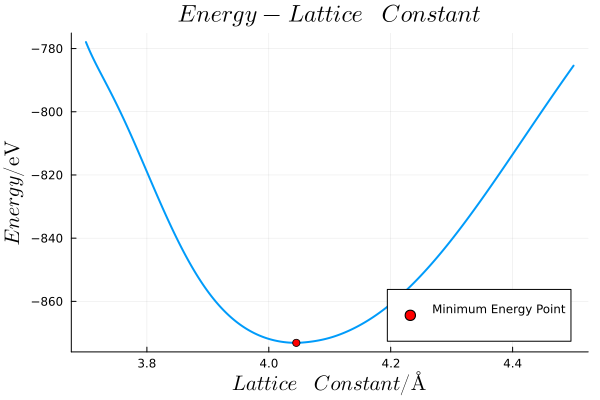

In [17]:
Plots.plot(cl,El,label="",xlabel=L"Lattice \quad Constant/\mathrm{\AA}",ylabel=L"Energy/\mathrm{eV}",title=L"Energy-Lattice \quad Constant", xlabelfontsize=14, ylabelfontsize=14, titlefontsize=16,lw=2)
minindex=argmin(El)
Plots.scatter!([cl[minindex]],[El[minindex]],label="Minimum Energy Point\n",color=:Red)

In [60]:
dm=deform_mat(1,0.1)
# deform_cell!(fcell,)

UndefVarError: UndefVarError: `deform_mat` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [59]:
cl

3.4:0.0011011011011011012:4.5

In [41]:
# 定义矩阵
matrix = [1 2 3; 4 5 6; 7 8 9]

# LaTeX 格式化矩阵的字符串
latex_matrix = L"\left[\begin{matrix}1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9\end{matrix}\right]"

# 打印 LaTeX 字符串


$\left[\begin{matrix}1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9\end{matrix}\right]$


In [73]:
El[129]

-694.3693969476806

In [12]:
phi=0.0
rij=2.25
if rij <= 3
    phi+=exp(1.0655898030717 + 6.9189333025554 * rij - 5.4560152009179 * rij^2 + 0.97305935423516 * rij^3)
end


phi

1.1006126573754167

In [13]:
phi=0.0
rij=2.25
if 2.2 < rij ≤ 3.2
    phi+=10.797831008871 * (3.2 - rij)^4 - 38.354420072333 * (3.2 - rij)^5 + 
           83.609733168086 * (3.2 - rij)^6 - 75.644960845874 * (3.2 - rij)^7 + 
           27.397628449176 * (3.2 - rij)^8
end
if 2.2 < rij ≤ 4.8
    phi+= -1.6404275277304 * (4.8 - rij)^4 + 1.9359384900534 * (4.8 - rij)^5 - 
           2.3676607051992 * (4.8 - rij)^6 + 0.68948838258734 * (4.8 - rij)^7 - 
           0.14749445109681 * (4.8 - rij)^8
end
if 2.2 < rij ≤ 6.5
    phi+= 0.19214771321964 * (6.5 - rij)^4 - 0.40788777117632 * (6.5 - rij)^5 + 
           0.33795215935241 * (6.5 - rij)^6 - 0.12880925102229 * (6.5 - rij)^7 + 
           0.019019373704492 * (6.5 - rij)^8
end
phi

1.1141859104473042

In [10]:
ll= [1.1006126573754167,
 8.794900843169243,
 -29.677919120838677,
 61.460836829180174,
-52.8256974202253,
 18.17614648204986,
-69.36138719393267,
 208.733644828511,
-650.9693622469331,
483.4017474906985,
-263.6921039937702,
 62.688942014912314,
-565.5686592959923,
1991.538956315379,
 -3226.038643469871,
2024.4527838481108]



16-element Vector{Float64}:
     1.1006126573754167
     8.794900843169243
   -29.677919120838677
    61.460836829180174
   -52.8256974202253
    18.17614648204986
   -69.36138719393267
   208.733644828511
  -650.9693622469331
   483.4017474906985
  -263.6921039937702
    62.688942014912314
  -565.5686592959923
  1991.538956315379
 -3226.038643469871
  2024.4527838481108

In [11]:
sum(ll[2:end])

1.1141859104473042